Exploring Attribution Channel

This exercise looks at Company's attribution channels - how it behaves over time and dives deep into its relationship and impact on other dimensions such as purchase type, tour categories, and commission rates. I chose this particular aspect of the data set because I feel that this has interesting insights on Company's demographics and revenues. 

In [33]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Data Cleaning + Feature Engineering

In [34]:
fact_checkout = pd.read_csv("/home/kla/Documents/Scripts/file.csv")
pd.set_option('display.max_columns', None)

In [35]:
fact_checkout.shape

(196488, 33)

In [36]:
fact_checkout.head(5)


,date_of_creation,date_of_checkout,bookings,coupon_information,update_timestamp,cycle_id,cycle_timestamp,purchase_type_id,is_fraud,week,tour_category_id,date_of_travel,commission_rate,shopping_cart_id_a,customer_id_a,customer_address_id_a,billing_id_a,coupon_id_a,reseller_id_a,reseller_campaign_id_a,gyg_campaign_id_a,currency_id_a,shopping_cart_status_id_a,coupon_segment_id_a,attribution_id_a,device_id_a,exchange_rate_a,gmv_a,gmv_after_coupons_a,visitor_id_a,session_id_a,token_a,commission_rate_a
0,2018-09-01T14:49:24.000+02:00,2018-09-01T15:18:03.000+02:00,1,[],2018-09-01T15:02:58.000+02:00,0,2019-10-15T03:21:00.533+02:00,1,False,2018-08-27T00:00:00.000+02:00,4.0,2018-09-02T09:00:00.000+02:00,25.0,687762823,-1489971149,-2051030396,1092304505,-1670924195,1910520950,-1583472726,-1670924195,-1712319331,-559580957,-559580957,-559580957,1765031574,5.658798,72.359966,72.359966,-1969293373,-1030158483,-1722411927,1470.532217
1,2018-09-01T16:12:47.000+02:00,2018-09-01T16:17:23.000+02:00,1,[],2018-09-01T16:16:54.000+02:00,0,2019-10-15T03:21:00.533+02:00,1,False,2018-08-27T00:00:00.000+02:00,1.0,2018-09-12T13:15:00.000+02:00,25.0,2091941823,549284145,2072690586,507456197,-1670924195,-1670924195,933211791,-1670924195,-1712319331,-559580957,-559580957,1765031574,1765031574,5.658798,8.334656,8.334656,2091086248,1962332134,-652614116,1470.532217
2,2018-09-01T21:56:29.000+02:00,2018-09-01T22:01:36.000+02:00,1,[],2018-09-01T21:57:59.000+02:00,0,2019-10-15T03:21:00.533+02:00,1,False,2018-08-27T00:00:00.000+02:00,105.0,2018-09-04T12:30:00.000+02:00,15.0,675367423,-885361612,991300386,-832668344,-1670924195,-1895386124,933211791,-1670924195,-1950643591,-559580957,-559580957,-1823081949,1765031574,24.113550,95.929994,95.929994,1418851735,966284657,1508759480,882.319330
3,2018-09-02T00:25:25.000+02:00,2018-09-02T00:26:47.000+02:00,1,[],2018-09-02T00:26:08.000+02:00,0,2019-10-15T03:21:00.533+02:00,2,False,2018-08-27T00:00:00.000+02:00,1.0,2018-10-26T10:45:00.000+02:00,30.0,-1682036577,934970287,-296492298,-318408915,-1670924195,1910520950,-1583472726,-1670924195,519220707,-559580957,-559580957,-559580957,-559580957,6.570827,21.497729,21.497729,1665709846,612665010,641025172,1764.638661
4,2018-09-02T14:56:47.000+02:00,2018-09-02T15:05:28.000+02:00,1,[],2018-09-02T15:01:53.000+02:00,0,2019-10-15T03:21:00.533+02:00,1,False,2018-08-27T00:00:00.000+02:00,1.0,2018-09-12T09:30:00.000+02:00,25.0,1768303823,-1355917228,425696601,662506702,-1670924195,1910520950,-180765446,-1670924195,-797927272,-559580957,-559580957,1023896466,-559580957,5.069689,12.373175,12.373175,560383644,-1824515114,-380974197,1470.532217


In [37]:
fact_checkout.describe()

,bookings,cycle_id,purchase_type_id,tour_category_id,commission_rate,shopping_cart_id_a,customer_id_a,customer_address_id_a,billing_id_a,coupon_id_a,reseller_id_a,reseller_campaign_id_a,gyg_campaign_id_a,currency_id_a,shopping_cart_status_id_a,coupon_segment_id_a,attribution_id_a,device_id_a,exchange_rate_a,gmv_a,gmv_after_coupons_a,visitor_id_a,session_id_a,token_a,commission_rate_a
count,196488.000000,196488.0,196488.000000,195624.000000,195624.000000,1.964880e+05,1.964880e+05,1.964880e+05,1.964880e+05,1.964880e+05,1.964880e+05,1.964880e+05,1.964880e+05,1.964880e+05,196488.0,1.964880e+05,1.964880e+05,1.964880e+05,196488.000000,196488.000000,196488.000000,1.964880e+05,1.964880e+05,1.964880e+05,195624.000000
mean,1.283259,0.0,1.458018,71.315319,25.797274,6.834136e+05,3.070490e+06,4.872676e+06,-3.732976e+07,-1.638105e+09,6.460756e+08,-8.270045e+07,-1.651316e+09,-9.814456e+08,-559580957.0,-5.278203e+08,-3.691310e+08,1.591996e+08,336.677220,23.635227,23.449895,-5.194931e+06,-1.136986e+06,-4.716126e+06,1517.428927
std,0.861271,0.0,0.705710,69.794470,8.175597,1.240188e+09,1.238721e+09,1.241007e+09,1.249356e+09,2.860966e+08,1.615105e+09,1.233582e+09,2.293420e+08,1.067956e+09,0.0,2.705251e+08,9.852125e+08,1.198417e+09,5757.302315,30.401961,30.233303,1.241188e+09,1.228062e+09,1.239668e+09,480.899125
min,0.000000,0.0,1.000000,0.000000,0.000000,-2.147472e+09,-2.147448e+09,-2.147479e+09,-2.147482e+09,-2.146919e+09,-2.143574e+09,-2.147211e+09,-1.982704e+09,-2.017639e+09,-559580957.0,-1.823082e+09,-1.823082e+09,-1.823082e+09,4.834334,0.000000,0.000000,-2.147464e+09,-2.147425e+09,-2.147447e+09,0.000000
25%,1.000000,0.0,1.000000,4.000000,20.002000,-1.075874e+09,-1.069702e+09,-1.068784e+09,-1.146079e+09,-1.670924e+09,-1.670924e+09,-1.583473e+09,-1.670924e+09,-1.712319e+09,-559580957.0,-5.595810e+08,-5.595810e+08,-5.595810e+08,5.658798,7.762595,7.698191,-1.083144e+09,-1.056256e+09,-1.081301e+09,1176.543416
50%,1.000000,0.0,1.000000,36.000000,25.000000,-1.513710e+05,4.843499e+06,2.774212e+06,-5.046852e+07,-1.670924e+09,1.910521e+09,9.332118e+08,-1.670924e+09,-1.712319e+09,-559580957.0,-5.595810e+08,-5.595810e+08,-5.595810e+08,5.658798,14.775072,14.699302,-8.259852e+06,4.200000e+01,-1.029814e+07,1470.532217
75%,1.000000,0.0,2.000000,133.000000,30.000000,1.077180e+09,1.073641e+09,1.080665e+09,1.045796e+09,-1.670924e+09,1.910521e+09,9.332118e+08,-1.670924e+09,6.437216e+07,-559580957.0,-5.595810e+08,-3.970649e+08,1.765032e+09,6.442276,28.023859,27.835856,1.071680e+09,1.050571e+09,1.069362e+09,1764.638661
max,22.000000,0.0,3.000000,492.000000,100.000000,2.147482e+09,2.147476e+09,2.147467e+09,2.147477e+09,2.139067e+09,2.146113e+09,2.145956e+09,2.100926e+09,1.951875e+09,-559580957.0,1.765032e+09,1.765032e+09,1.765032e+09,153966.423197,1150.576497,1150.576497,2.147481e+09,2.147469e+09,2.147483e+09,5882.128869


In [38]:
#fact_checkout.info()

In [39]:
#checking out rows with null and removing them
fact_checkout_null = fact_checkout[fact_checkout.isna().any(axis=1)]
fact_checkout_null.shape

(115471, 33)

In [40]:
#cleaning the tanle by removing columns that have a lot of null values or are irrelevant
fact_checkout.drop(columns=['coupon_information', 'cycle_id'], axis=1, inplace=True)
fact_checkout.dropna(0, inplace=True)

In [41]:
fact_checkout.columns

Index(['date_of_creation', 'date_of_checkout', 'bookings', 'update_timestamp',
       'cycle_timestamp', 'purchase_type_id', 'is_fraud', 'week',
       'tour_category_id', 'date_of_travel', 'commission_rate',
       'shopping_cart_id_a', 'customer_id_a', 'customer_address_id_a',
       'billing_id_a', 'coupon_id_a', 'reseller_id_a',
       'reseller_campaign_id_a', 'gyg_campaign_id_a', 'currency_id_a',
       'shopping_cart_status_id_a', 'coupon_segment_id_a', 'attribution_id_a',
       'device_id_a', 'exchange_rate_a', 'gmv_a', 'gmv_after_coupons_a',
       'visitor_id_a', 'session_id_a', 'token_a', 'commission_rate_a'],
      dtype='object')

In [42]:
#cleaning the relevant date columns and creating a column that has the name of the day 
fact_checkout['date_of_creation'] = pd.to_datetime(fact_checkout['date_of_creation'], utc=True).dt.date
fact_checkout['date_of_checkout'] = pd.to_datetime(fact_checkout['date_of_checkout'], utc=True).dt.date
fact_checkout['date_of_travel'] = pd.to_datetime(fact_checkout['date_of_travel'], utc=True).dt.date
fact_checkout['day_of_week'] = pd.to_datetime(fact_checkout['date_of_creation'], utc=True).dt.day_name()

In [43]:
#rounding off the commission_rate
fact_checkout['commission_rate_a'] = fact_checkout['commission_rate_a'].round()

In [44]:
#creating a function to divide the commission rate to categories based on where they fall on the quantile range (.75, .5, below .5 quantiles)
def commission_level(commission_rate_a):
    if commission_rate_a >= 1765:  
        return 'high'
    if commission_rate_a >= 1176: 
        return 'medium'
    else:
        return 'low' 

In [45]:
#applying the new column based on the commission rate on the entire df
fact_checkout['commission_level'] = fact_checkout['commission_rate_a'].apply(commission_level)


In [46]:
fact_checkout.head(3)

,date_of_creation,date_of_checkout,bookings,update_timestamp,cycle_timestamp,purchase_type_id,is_fraud,week,tour_category_id,date_of_travel,commission_rate,shopping_cart_id_a,customer_id_a,customer_address_id_a,billing_id_a,coupon_id_a,reseller_id_a,reseller_campaign_id_a,gyg_campaign_id_a,currency_id_a,shopping_cart_status_id_a,coupon_segment_id_a,attribution_id_a,device_id_a,exchange_rate_a,gmv_a,gmv_after_coupons_a,visitor_id_a,session_id_a,token_a,commission_rate_a,day_of_week,commission_level
0,2018-09-01,2018-09-01,1,2018-09-01T15:02:58.000+02:00,2019-10-15T03:21:00.533+02:00,1,False,2018-08-27T00:00:00.000+02:00,4.0,2018-09-02,25.0,687762823,-1489971149,-2051030396,1092304505,-1670924195,1910520950,-1583472726,-1670924195,-1712319331,-559580957,-559580957,-559580957,1765031574,5.658798,72.359966,72.359966,-1969293373,-1030158483,-1722411927,1471.0,Saturday,medium
1,2018-09-01,2018-09-01,1,2018-09-01T16:16:54.000+02:00,2019-10-15T03:21:00.533+02:00,1,False,2018-08-27T00:00:00.000+02:00,1.0,2018-09-12,25.0,2091941823,549284145,2072690586,507456197,-1670924195,-1670924195,933211791,-1670924195,-1712319331,-559580957,-559580957,1765031574,1765031574,5.658798,8.334656,8.334656,2091086248,1962332134,-652614116,1471.0,Saturday,medium
2,2018-09-01,2018-09-01,1,2018-09-01T21:57:59.000+02:00,2019-10-15T03:21:00.533+02:00,1,False,2018-08-27T00:00:00.000+02:00,105.0,2018-09-04,15.0,675367423,-885361612,991300386,-832668344,-1670924195,-1895386124,933211791,-1670924195,-1950643591,-559580957,-559580957,-1823081949,1765031574,24.113550,95.929994,95.929994,1418851735,966284657,1508759480,882.0,Saturday,low


In [47]:
#changing the dtypes of the relevant columns, which are seen as integers. 
#these need to be assigned to categorical type to make them discrete instead of continuous 

fact_checkout['device_id_a'] = fact_checkout['device_id_a'].astype("category", copy=True)
fact_checkout['attribution_id_a'] = fact_checkout['attribution_id_a'].astype("category", copy=True)
fact_checkout['purchase_type_id'] = fact_checkout['purchase_type_id'].astype("category", copy=True)
fact_checkout['tour_category_id'] = fact_checkout['tour_category_id'].astype("category", copy=True)

In [48]:
fact_checkout.shape

(195624, 33)

### PLOTTING THE DATA

The biggest volume of sales occurred in Jan 2019. The bulk of the purchases came from Purchase Type 1. There are also regular peaks happening throughout the timeline. It would be interesting to see if they correspond to the day of the week. 

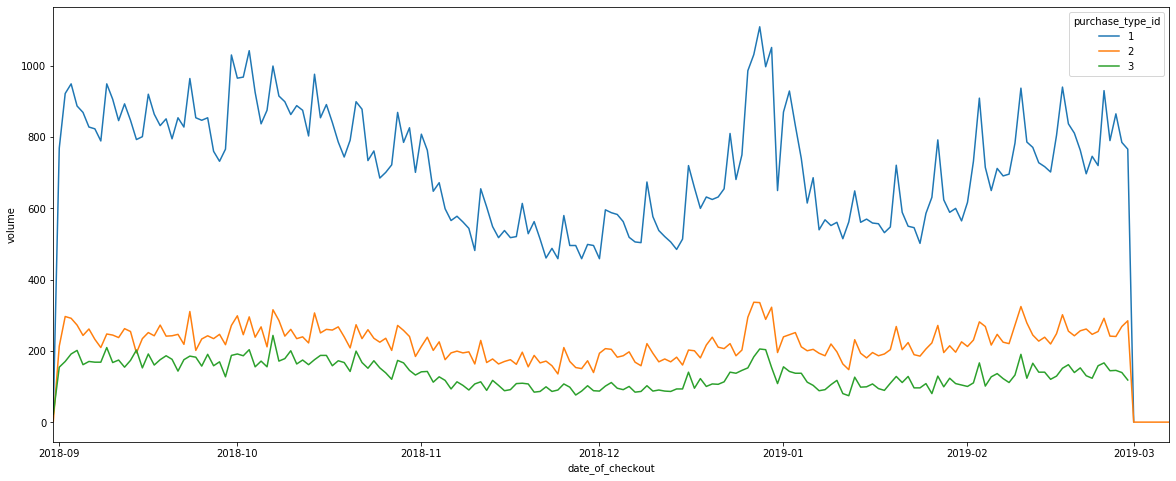

In [49]:
#plotting the number of sales via billing id against purchase type and checkout date
fig, ax = plt.subplots(figsize=(20,8))
plt.ylabel("volume")
fact_checkout.groupby(['date_of_checkout', 'purchase_type_id'])['billing_id_a'].count().unstack().plot(ax=ax)

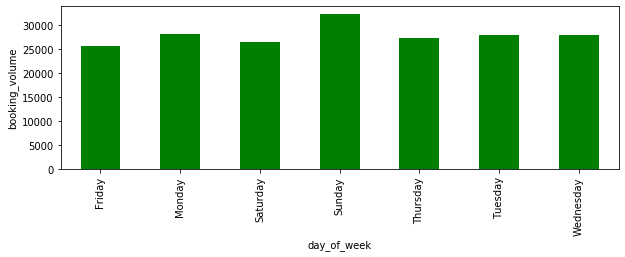

In [50]:
#plotting booking volume by day
fig, ax = plt.subplots(figsize=(10,3))
plt.ylabel("booking_volume")
fact_checkout.groupby(['day_of_week'])['bookings'].count().plot(kind='bar', stacked=True, color='green', ax=ax)


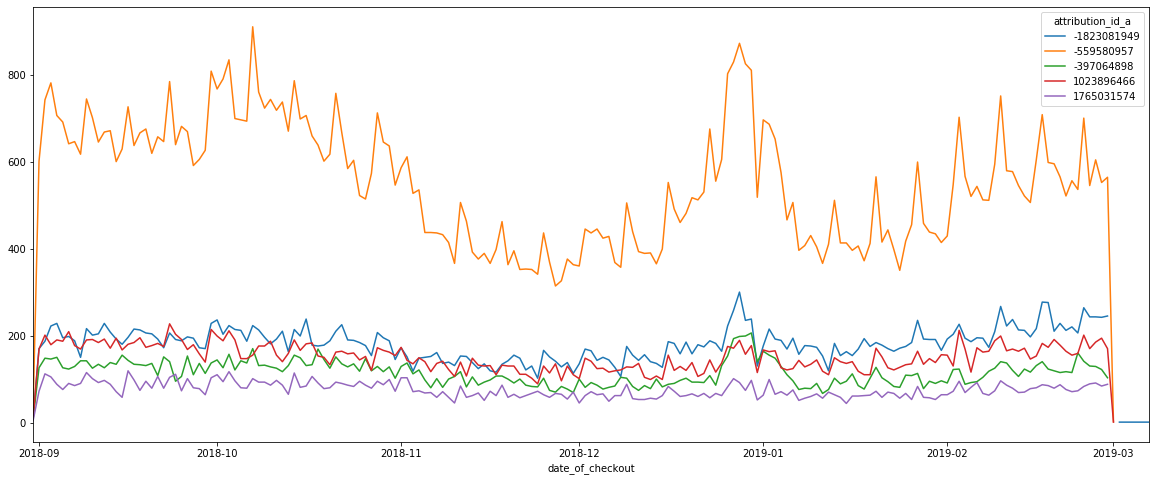

In [51]:
#plotting booking volume by attribution

fig, ax = plt.subplots(figsize=(20,8))
fact_checkout.groupby(['date_of_checkout', 'attribution_id_a'])['billing_id_a'].count().unstack().plot(ax=ax)

Sunday is when people tend to book their tours/tickets. It has the highest number of billing volume and bookings compared to other days. Over time, majority of the bookings come from channel -559580957. The gap between the other 4 channel is smaller, indicating that they have comparable usage among customers.

### Mapping Attribution Channels

In this part, I try to understand where the customers are coming from by looking at the devices and the attribution channels. I find something strange, however, here: that the device and the attribution channels are identically named but have different data, as seen below. In general, channels are different from devices so without knowing the reason behind this and for the purpose of this exercise, I'm going to focus on the attribution channels instead.

In [52]:
fact_checkout['device_id_a'].value_counts()


-559580957     96700
 1765031574    63027
-1823081949    15036
-397064898     13825
 1023896466     7036
Name: device_id_a, dtype: int64

In [53]:
fact_checkout['attribution_id_a'].value_counts()

-559580957     100351
-1823081949     33172
 1023896466     27466
-397064898      20861
 1765031574     13774
Name: attribution_id_a, dtype: int64

In [54]:
#on average, customers from attribution channel -397064898 has the highest commission rate on average
fact_checkout.groupby('attribution_id_a')[['commission_rate_a']].agg(['median', np.mean])


commission_rate_a             
                            median         mean
attribution_id_a                               
-1823081949                 1471.0  1463.587694
-559580957                  1471.0  1515.030373
-397064898                  1471.0  1557.155601
 1023896466                 1471.0  1550.829972
 1765031574                 1471.0  1539.585088

On average, customers from attribution channel -397064898 has the highest commission rate on average


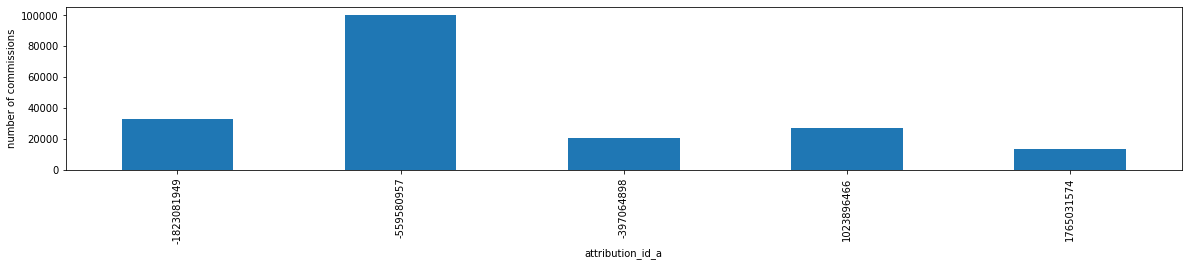

In [62]:
#looking at the volume of commissions based on channel
fig, ax = plt.subplots(figsize=(20,3))
plt.ylabel("number of commissions")
commissionrate_by_attribution =  fact_checkout.groupby(['attribution_id_a'])['commission_rate_a'].count().plot(kind='bar', ax=ax)

Attribution channel -559580957 is the source of the most number of commissions


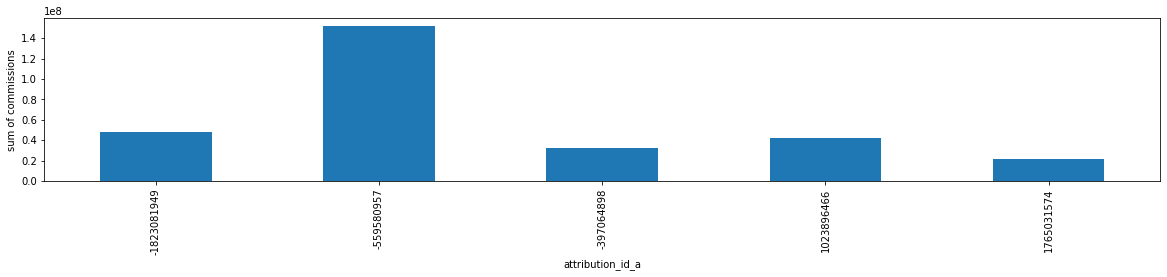

In [63]:
#looking at the volume of commissions based on channel
fig, ax = plt.subplots(figsize=(20,3))
plt.ylabel("sum of commissions")
commissionrate_by_attribution =  fact_checkout.groupby(['attribution_id_a'])['commission_rate_a'].sum().plot(kind='bar', ax=ax)


Attribution channel -559580957's total commission value is the highest among the other channels


### Attribution Channels against Purchase Type

In [57]:
customers_type = fact_checkout.groupby(['purchase_type_id', 'attribution_id_a'])['commission_rate_a'].count().unstack('purchase_type_id')
customers_type.fillna(value=0)
customers_type

purchase_type_id,1,2,3
attribution_id_a,,,
-1823081949,23203,7071,2898
-559580957,76418,14283,9650
-397064898,4138,9466,7257
1023896466,16444,7370,3652
1765031574,10096,2616,1062


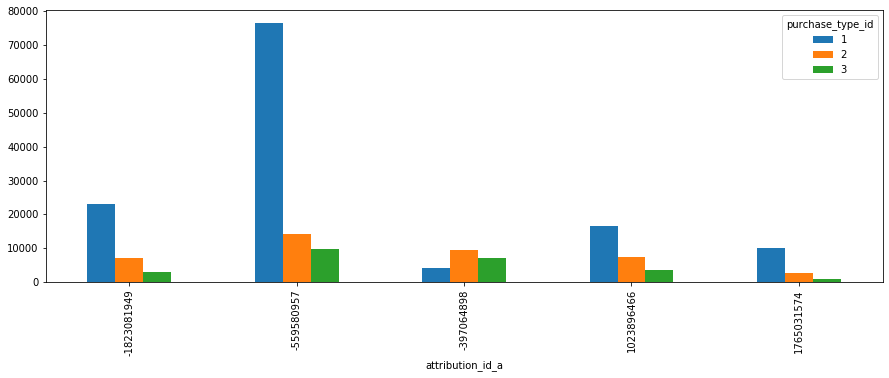

In [65]:
#plotting purchase types by attribution channel
customers_type.plot(kind='bar',  figsize=(15,5))


Those that use attribution channel -559580957 come from Purchase_type_ID 1 and we can say that this is the most valuable Purchase Type for the company. The only channel that bucks the trend of having Purchase Type 1 as the biggest type of purchase is -397064898, where Purchase Type 2 is the biggest.


### Commission Levels of Attribution Channels

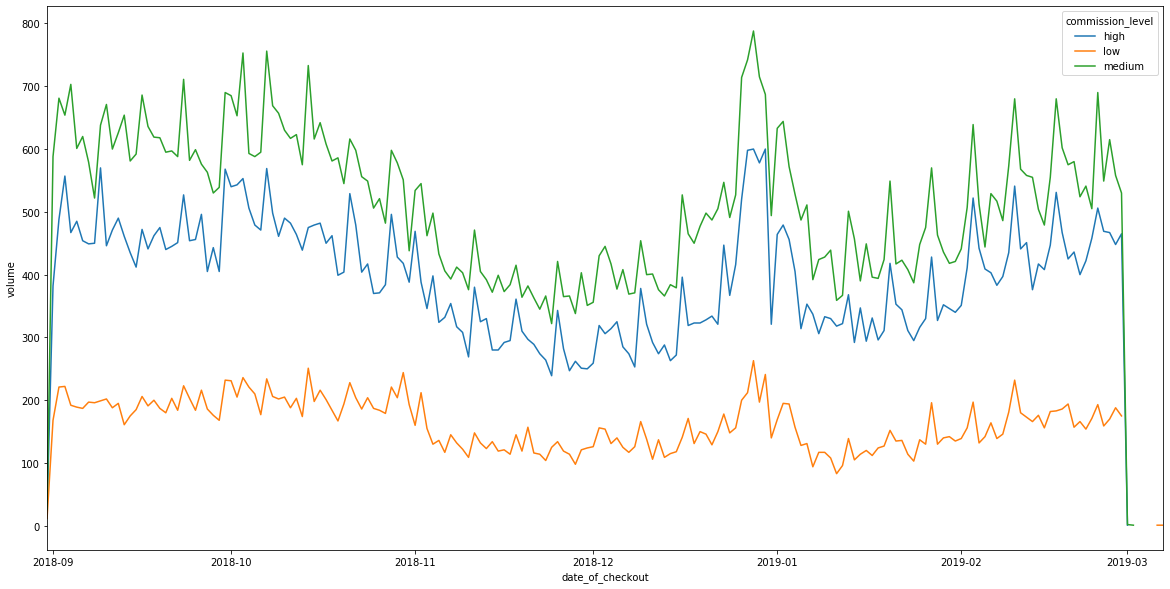

In [59]:
fig, ax = plt.subplots(figsize=(20,10))
plt.ylabel('volume')
fact_checkout.groupby(['date_of_checkout', 'commission_level'])['commission_level'].count().unstack().plot(ax=ax)

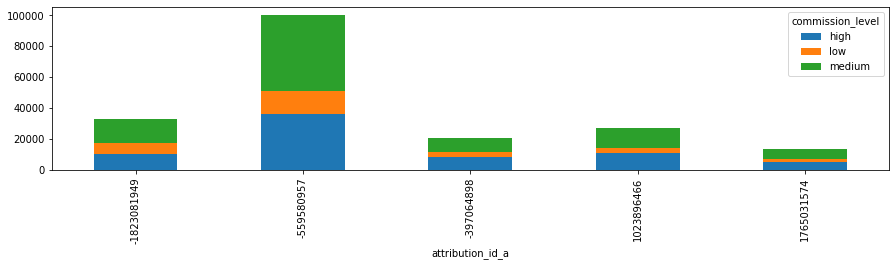

In [66]:
#In terms of commission level, most of Company's commissions are mid-level 
commission_level_breakdown = fact_checkout.groupby(['commission_level' ,'attribution_id_a'])['commission_level'].count().unstack('commission_level')
commission_level_breakdown.plot(kind='bar', stacked=True, figsize=(15,3))

Bookings with medium-level commissions have the highest volume in the company. About 48% of the commissions received by Company come from mid-level bookings. Furthermore, based on this graph, -559580957 is the most valuable channel, capturing the most number of high and medium level commissions.


### Attribution Channels of Bookings by Category

In [69]:
#Because of the huge number of tour_group_id, I decided to only check the top 15 by volume
#top 15 tours by volume count account for nearly 30% of the commissions for Company.
#If I had more information about the categories, I would probably do some feature engineering on it to reduce their number

fact_checkout.groupby(['commission_rate_a' ,'tour_category_id'])['tour_category_id'].count().nlargest(15).sum()/ fact_checkout.groupby(['commission_rate_a' ,'tour_category_id'])['tour_category_id'].count().sum()

0.28848709769762404

In [74]:
tour = fact_checkout.groupby(['commission_level' ,'tour_category_id'])['commission_level'].count().nlargest(15).unstack('tour_category_id')

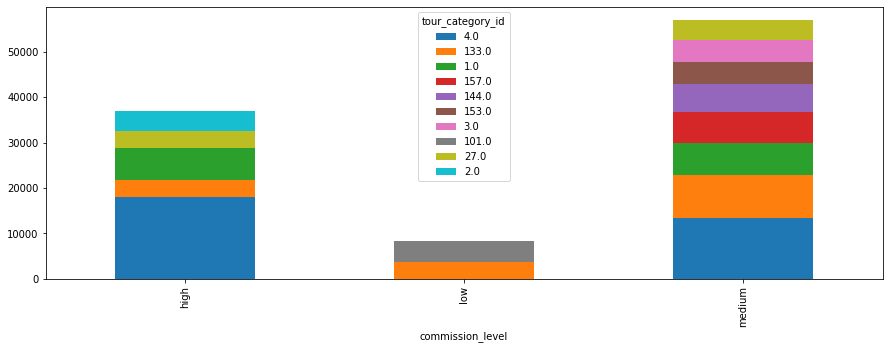

In [75]:
tour.plot(kind='bar', stacked=True, figsize=(15,5))


Tour category 4 is the biggest source of  high and mid-level commissions. In this sample of categories, there are more tours with medium commissions.

In [76]:

#looking at top tour categories based on attribution
tour_attribution = fact_checkout.groupby(['attribution_id_a' , 'tour_category_id'])['tour_category_id'].count().nlargest(15).unstack('tour_category_id')
tour_attribution

tour_category_id,4.0,133.0,1.0,144.0,157.0,27.0,3.0,153.0,2.0,123.0,35.0
attribution_id_a,,,,,,,,,,,
-559580957,15249.0,9277.0,7653.0,6762.0,6762.0,4823.0,4365.0,3814.0,3771.0,3165.0,2962.0
1023896466,6240.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1823081949,4226.0,3195.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-397064898,3525.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


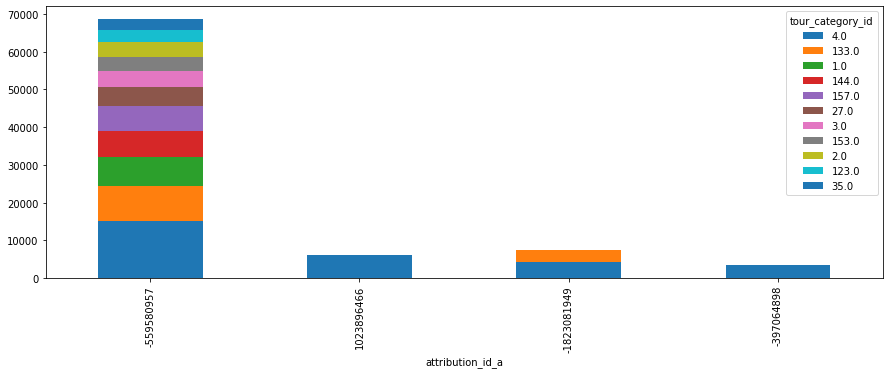

In [77]:
tour_attribution.plot(kind='bar', stacked=True, figsize=(15,5))


Breakdown of tour categories by attribution - this shows which top tour categories based on commision levels come from which channels. This also indicates that the Company needs to look at how to maximize the other attribution channels.

Along with the "tour by commission level" chart, we can also see that high level commissions are not spread to other channels. Cpmpany may be underserving a demographic here (people who have appetite for tours with high level commissions).

Company may also look at its media channel spending to see if it is over-investing in some channels at the expense of others. In general, the insights from this exercise should give Company some ideas on where to look at when it comes to optimizing and prioritizing its attribution channels.